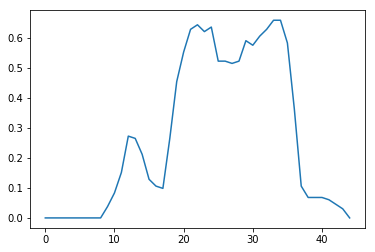

45
[0.27272727 0.64393939 0.63636364 0.59090909 0.65909091]
max= [0.65909091 0.64393939 0.63636364 0.59090909 0.27272727]
33 22 27


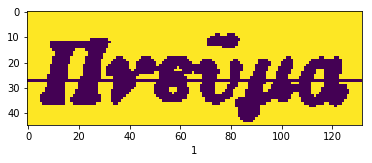

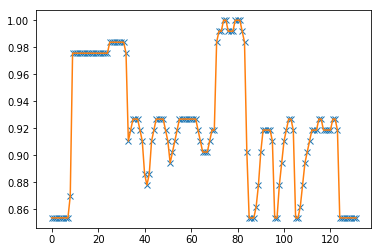

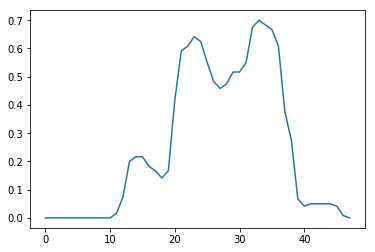

48
[0.21666667 0.64166667 0.7        0.05      ]
max= [0.7        0.64166667 0.21666667 0.05      ]
33 23 28


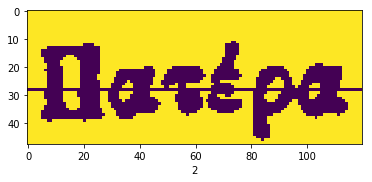

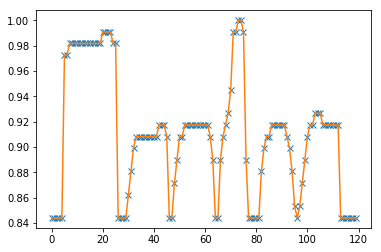

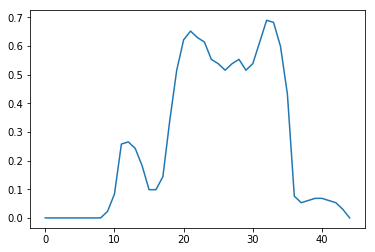

45
[0.26515152 0.65151515 0.5530303  0.68939394 0.06818182]
max= [0.68939394 0.65151515 0.5530303  0.26515152 0.06818182]
32 21 26


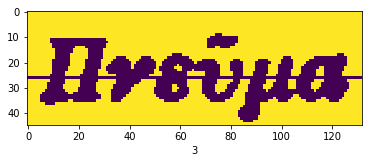

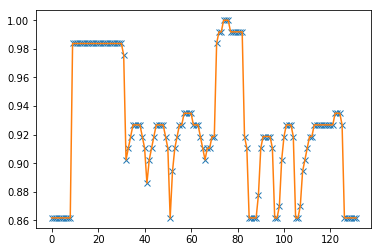

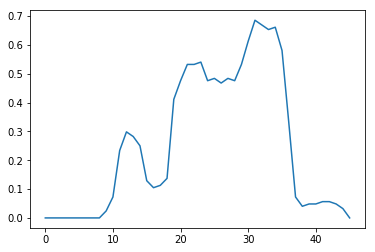

46
[0.2983871  0.54032258 0.48387097 0.48387097 0.68548387 0.66129032
 0.05645161]
max= [0.68548387 0.66129032 0.54032258 0.48387097 0.48387097 0.2983871
 0.05645161]
31 34 32


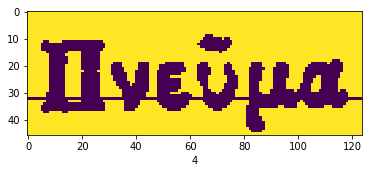

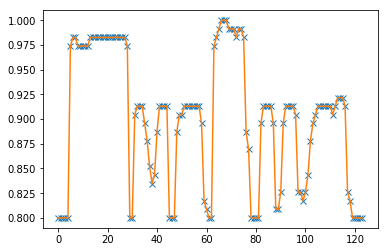

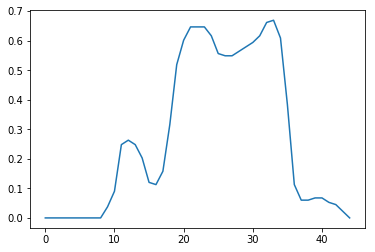

45
[0.26315789 0.64661654 0.66917293 0.06766917]
max= [0.66917293 0.64661654 0.26315789 0.06766917]
33 21 27
5
I= 1
OOOOOO 131 132 132
coef2pearson= (1.0, 0.0)
coef2spearman= SpearmanrResult(correlation=0.9999999999999998, pvalue=0.0)
tau 1.0


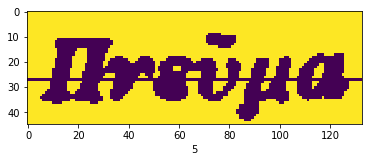

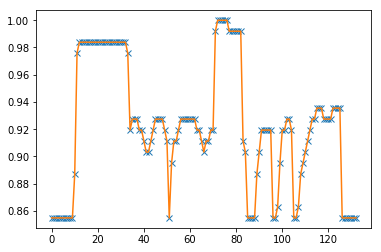

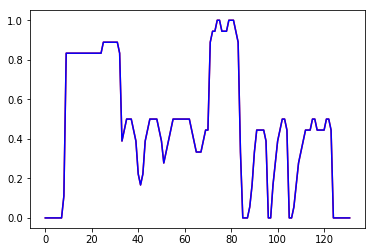

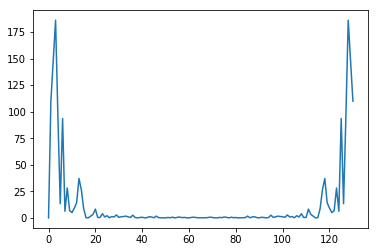

I= 2
OOOOOO 119 132 120
coef2pearson= (0.2378118590306524, 0.009205873543084268)
coef2spearman= SpearmanrResult(correlation=0.1340721289290785, pvalue=0.14603273790090174)
tau 0.1148978502491035


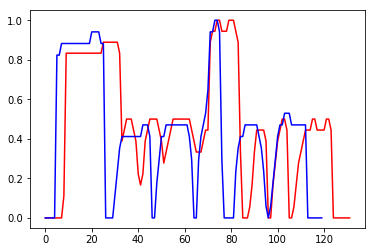

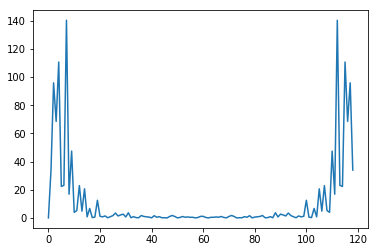

I= 3
OOOOOO 131 132 132
coef2pearson= (0.9499799283678704, 4.671793030697696e-67)
coef2spearman= SpearmanrResult(correlation=0.9259091624412406, pvalue=2.175227455320244e-56)
tau 0.8737348809319387


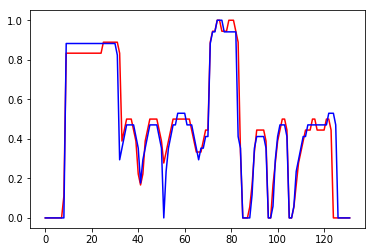

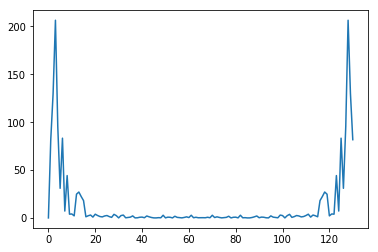

In [4]:
import numpy as np
import cv2 as cv2
from matplotlib import pyplot as plt
from scipy.signal import argrelextrema
from scipy import interpolate
from scipy.interpolate import interp1d
from scipy.signal import correlate
from scipy.stats.stats import pearsonr 
from scipy.stats.stats import  spearmanr
from scipy.optimize import linear_sum_assignment
import math 
import scipy.stats as stats
from scipy.fftpack import fft, ifft
%run ProfileFunctions.py 

%run PgFunctions.py























def findUpperProfile(img3):
    mtrx=[]
    for col in img3.T:
        #print(col)
        count=0
        for row in col:
            
            #print(row)
            if row==255:
                count=count+1
                #print(count)
            else: 
                break
                
    
        #print('count=',count)
        mtrx.append(count)
    mtrx=np.asarray(mtrx)
    h=img3.shape[1]
    mtrx=h-mtrx
    mtrx = mtrx/max(mtrx)
    #mtrx = mtrx/max(mtrx)
    return mtrx



def findFFT(samples):
    #samples=np.array([1,2,3,1,4,2])
    #samples = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)

    top = np.max(samples)
    bottom = np.min(samples)
    mid = np.average(samples)
    normSamples = (samples - mid)
    #normSamples = (samples - 0)
    normSamples /= top - bottom

    spectrum = np.abs(fft(normSamples))
    spectrum *= spectrum


    #print(spectrum)
    #plt.plot(samples)
    plt.plot(spectrum)
    plt.show()

















files=['test/0174.pdf300/505-277-77-34.png','test/0174.pdf300/1913-201-80-35.png']
files=['test/0165.pdf300/2679-1527-122-37.png','word/pneuma.png']

files=['test/0192.pdf300/1500-474-132-35.png','word/pneuma.png']
files=['test/0186.pdf300/335-675-134-37.png','word/pneuma.png']

files=['test/0173.pdf300/1287-1550-76-34.png','test/0174.pdf300/1913-201-80-35.png']
files=['word/pantokrator.png','word/pneuma.png']

files=['word/pneuma.png','test/0185.pdf300/1217-1486-120-38.png']

files=['word/pneuma.png','test/0185.pdf300/308-1122-132-35.png']



files=['test/0155.pdf300/528-1612-121-38.png','test/0165.pdf300/1807-1096-119-37.png']

files=['test/0185.pdf300/1217-1486-120-38.png','word/kyrios.png']

files=['test/0172.pdf300/1691-383-75-33.png','test/0173.pdf300/1925-1195-77-35.png']
files=['test/0160.pdf300/850-295-67-37.png','test/0173.pdf300/1925-1195-77-35.png']

files=['test/0181.pdf300/395-1845-84-36.png','test/0173.pdf300/1925-1195-77-35.png']







files = [line.rstrip() for line in open("word/theos.png.txt", 'r')]
files = [line.rstrip() for line in open("word/oti.png.txt", 'r')]
files = [line.rstrip() for line in open("word/paulos.png.txt", 'r')]
files = [line.rstrip() for line in open("word/pneuma.png.txt", 'r')]


interpList=[]
mtrxList=[]
metr=0
for file in files:
    metr=metr+1
    if metr>5:
        continue
    
    
    img = cv2.imread(file,0)

    kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2))
    
    img3,ym=drawMiddleLine(img)
    #img3 = cv2.erode(img3, kernel, iterations=1)
    plt.figure()
    plt.xlabel(metr)
    plt.imshow(img3)
    
    mtrx=findUpperProfile(img3)
    mtrxList.append(mtrx)
    x = np.arange(0, mtrx.shape[0], 1)
    #mtrx = mtrx/max(mtrx)
    
    tck = interpolate.splrep(x, mtrx, s=0)
    #tck = interpolate.UnivariateSpline(x, mtrx, s = 5e1)(x)
    #F   = interpolate.PPoly.from_spline(tck)
    xnew = np.arange(0, mtrx.shape[0], 1)
    ynew = interpolate.splev(xnew, tck, der=0)
    ynew=ynew/max(ynew)
    #from scipy.signal import savgol_filter
    #ynew = savgol_filter(ynew, 15, 3) # window size 51, polynomial order 3
    interpList.append(ynew)
    plt.figure()
    plt.plot(x, mtrx, 'x', xnew, ynew)


print(len(interpList))  
X=mtrxList[0]

for i in range(3):
    print("I=",i+1)
    Y=(mtrxList[i])
    #X,Y,x=alignSignals(mtrxList[0],mtrxList[1]-0.01)
    #coef=pearsonr(X,Y)

    #X,Y,x=alignSignals(interpList[0],interpList[1])
    #coef=pearsonr(interpList[0],interpList[1])

    #print('coef1=',coef)

    mini=min(len(X),len(Y))-1
    #mini=len(X)
    
    
    #@@@@@@@@@@@@@
    
    DX=max(X)-min(X)
    DY=max(Y)-min(Y)
    X=X/DX
    Y=Y/DY
    
    X=X-min(X)
    Y=Y-min(Y)
    #@@@@@@@@@@@@@@@@@@
    
    
    
    print("OOOOOO",mini, len(X),len(Y))
    coef=pearsonr(X[0:mini],Y[0:mini]-0.00)  
    print('coef2pearson=',coef)
    coefsp=spearmanr(X[0:mini],Y[0:mini]-0.00) 
    print('coef2spearman=',coefsp)
    tau, p_value = stats.kendalltau(X[0:mini],Y[0:mini]-0.00) 
    
    
    print('tau',tau)
    
    plt.figure()
    x = np.arange(0, len(X), 1)
    plt.plot(x, X, 'r-') 
    x2 = np.arange(0, len(Y), 1)
    plt.plot(x2, Y, 'b-') 
    plt.show()
    
    findFFT(Y[0:mini])
    
    #plt.plot(x[:mini], X[:mini], 'r-', x[:mini]+0, Y[:mini],'b--') 
    #print(X)
    #print(Y)

    #out, pairs = closest_pairs(X,Y)
    #print(pairs)   






















Threshold: 10
nonmaxSuppression:True
neighborhood: 2
Total Keypoints with nonmaxSuppression: 19
Total Keypoints without nonmaxSuppression: 299


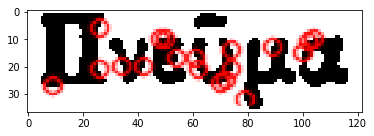

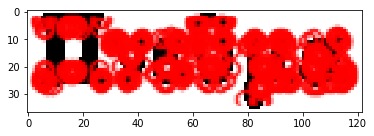

In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('word/pneuma.png',0)
# Initiate FAST object with default values
fast = cv.FastFeatureDetector_create()
# find and draw the keypoints
kp = fast.detect(img,None)
img2 = cv.drawKeypoints(img, kp, None, color=(255,0,0))
# Print all default params
print( "Threshold: {}".format(fast.getThreshold()) )
print( "nonmaxSuppression:{}".format(fast.getNonmaxSuppression()) )
print( "neighborhood: {}".format(fast.getType()) )
print( "Total Keypoints with nonmaxSuppression: {}".format(len(kp)) )
#cv.imwrite('fast_true.png',img2)
plt.imshow(img2)
# Disable nonmaxSuppression
fast.setNonmaxSuppression(0)
kp = fast.detect(img,None)
print( "Total Keypoints without nonmaxSuppression: {}".format(len(kp)) )
img3 = cv.drawKeypoints(img, kp, None, color=(255,0,0))
#cv.imwrite('fast_false.png',img3)
plt.figure()
plt.imshow(img3)

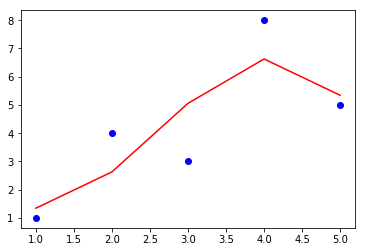

In [18]:
import matplotlib.pyplot as plt
from scipy import interpolate
x = [1,2,3,4,5]
y = [1,4,3,8,5]
yinterp = interpolate.UnivariateSpline(x, y, s = 5e8)(x) 
plt.plot(x, y, 'bo', label = 'Original')
plt.plot(x, yinterp, 'r', label = 'Interpolated')
plt.show()

[1 3]


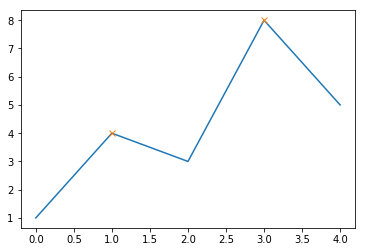

In [15]:
import matplotlib.pyplot as plt
#from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
import numpy as np

y = [1,4,3,8,5]
y=np.asarray(y)
peaks, _ = find_peaks(y, height=0)
print(peaks)
plt.plot(y)
plt.plot(peaks, y[peaks], "x")

plt.show()